# Lotka-Volterra equations

In [1]:
#matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import integrate
#import ipywidgets as ipw

Also known as *predator-prey equations*, describe the variation in populations of two species which interact via predation. For example, wolves (predators) and deer (prey). This is a classical model to represent the dynamic of two populations. 

Let $\alpha>0$, $\beta>0$, $\delta>0$ and $\gamma>0$ . The system is given by 

$$\left\{
\begin{array}{ll}
\dot{x} = x (\alpha - \beta y)\\
\dot{y} = y (-\delta + \gamma x)
\end{array}
\right.
$$


Where $x$ represents prey population and $y$ predators population.
It's a system of first-order non-linear ordinary differential equations.

## Problem reformulation

We pose, $$X = \begin{pmatrix} x \\ 
                                             y \end{pmatrix}$$
and rewrite so the problem above as 

$$ \dot{X} = \begin{pmatrix} x (\alpha - \beta y) \\
                             y (-\delta + \gamma x) \end{pmatrix} = f(X)$$
                             
                             
**Remark** : it's an autonomous problem.

## Numerical simulation

## Settings

In [2]:
alpha = 1.  # reproduction rate for preys
beta = 1.   # mortality rate due to predators
delta = 1.  # mortality rate of predators
gamma = 1.  # reproduction rate for predators
x0 = 4.     # initial population of preys
y0 = 2.     # initial population of predators 

def derivative(X, t, alpha, beta, delta, gamma):
    x, y = X
    dotx = x * (alpha - beta * y)
    doty = y * (-delta + gamma * x)
    return np.array([dotx, doty])

Solving with `odeint`

In [3]:
Nt = 1000
tmax = 30.
t = np.linspace(0.,tmax, Nt)
X0 = [x0, y0]
res = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
x, y = res.T

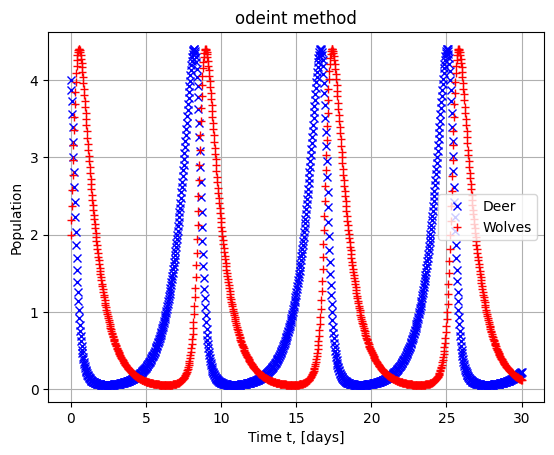

In [4]:
plt.figure()
plt.grid()
plt.title("odeint method")
plt.plot(t, x, 'xb', label = 'Deer')
plt.plot(t, y, '+r', label = "Wolves")
plt.xlabel('Time t, [days]')
plt.ylabel('Population')
plt.legend()

plt.show()

In [5]:
import random
import matplotlib.cm as cm 

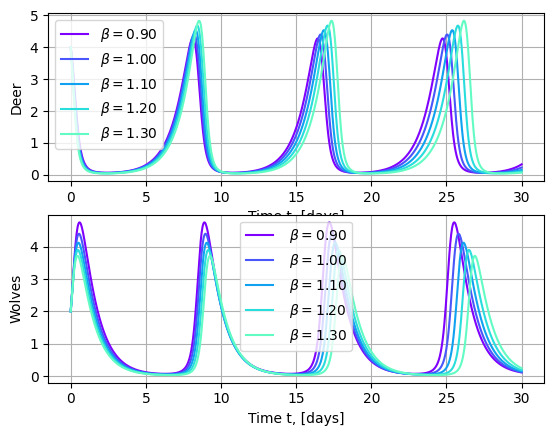

In [6]:
betas = np.arange(0.9, 1.4, 0.1)

nums=np.random.random((10,len(betas)))
colors = cm.rainbow(np.linspace(0, 1, nums.shape[0]))  # generate the colors for each data set

fig, ax = plt.subplots(2,1)

for beta, i in zip(betas, range(len(betas))):
    res = integrate.odeint(derivative, X0, t, args = (alpha,beta, delta, gamma))
    ax[0].plot(t, res[:,0], color = colors[i],  linestyle = '-', label = r"$\beta = $" + "{0:.2f}".format(beta))
    ax[1].plot(t, res[:,1], color = colors[i], linestyle = '-', label = r" $\beta = $" + "{0:.2f}".format(beta))
    ax[0].legend()
    ax[1].legend()

ax[0].grid()
ax[1].grid()
ax[0].set_xlabel('Time t, [days]')
ax[0].set_ylabel('Deer')    
ax[1].set_xlabel('Time t, [days]')
ax[1].set_ylabel('Wolves');

## Phase portrait 

The phase portrait is a geometrical representation of the trajectories of a dynamical system in the phase space (axes corresponding to the state variables $x$ and $y$). It is a tool for visualizing and analyzing the behavior of dynamic systems. Particularly, in case of oscillatory systems like Lotka-Volterra equations.

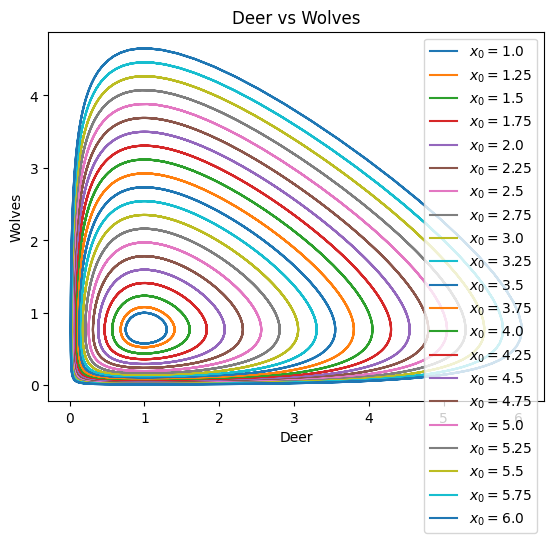

In [7]:
plt.figure()
IC = np.linspace(1.0, 6.0, 21) # initial conditions for deer population (prey)
for deer in IC:
    X0 = [deer, 1.0]
    Xs = integrate.odeint(derivative, X0, t, args = (alpha, beta, delta, gamma))
    plt.plot(Xs[:,0], Xs[:,1], "-", label = "$x_0 =$"+str(X0[0]))
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.legend()
plt.title("Deer vs Wolves");

 Theses curves illustrate that the system is periodic because they are closed.

In [8]:
1/alpha

1.0

Solving with explicit Euler method

In [9]:
def Euler(func, X0, t, alpha, beta, delta, gamma):
    """
    Euler solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1): 
        X[i+1] = X[i] + func(X[i], t[i], alpha,  beta, delta, gamma) * dt
    return X

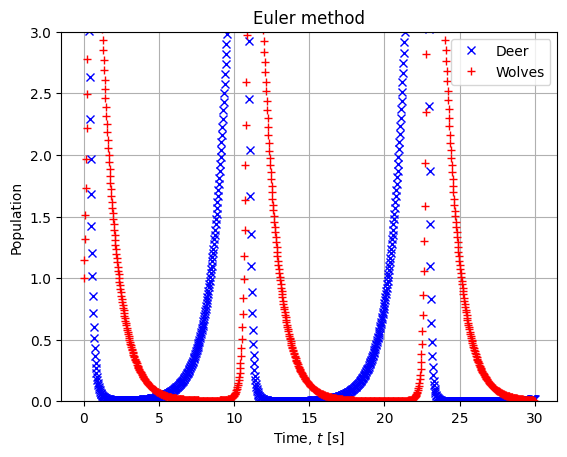

In [10]:
Xe = Euler(derivative, X0, t, alpha, beta, delta, gamma)
plt.figure()
plt.title("Euler method")
plt.plot(t, Xe[:, 0], 'xb', label = 'Deer')
plt.plot(t, Xe[:, 1], '+r', label = "Wolves")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.ylim([0.,3.])
plt.legend(loc = "best")

plt.show()

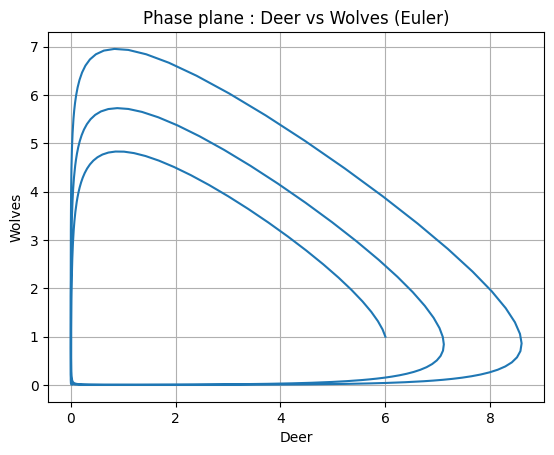

In [11]:
plt.figure()
plt.plot(Xe[:, 0], Xe[:, 1], "-")
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.grid()
plt.title("Phase plane : Deer vs Wolves (Euler)");

## With RK4 

In [12]:
def RK4(func, X0, t, alpha,  beta, delta, gamma):
    """
    Runge Kutta 4 solver.
    """
    dt = t[1] - t[0]
    nt = len(t)
    X  = np.zeros([nt, len(X0)])
    X[0] = X0
    for i in range(nt-1):
        k1 = func(X[i], t[i], alpha,  beta, delta, gamma)
        k2 = func(X[i] + dt/2. * k1, t[i] + dt/2., alpha,  beta, delta, gamma)
        k3 = func(X[i] + dt/2. * k2, t[i] + dt/2., alpha,  beta, delta, gamma)
        k4 = func(X[i] + dt    * k3, t[i] + dt, alpha,  beta, delta, gamma)
        X[i+1] = X[i] + dt / 6. * (k1 + 2. * k2 + 2. * k3 + k4)
    return X

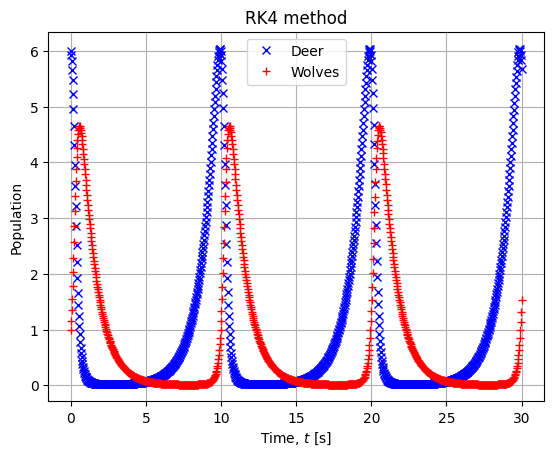

In [13]:
Xrk4 = RK4(derivative, X0, t, alpha,  beta, delta, gamma)
plt.figure()
plt.title("RK4 method")
plt.plot(t, Xrk4[:, 0], 'xb', label = 'Deer')
plt.plot(t, Xrk4[:, 1], '+r', label = "Wolves")
plt.grid()
plt.xlabel("Time, $t$ [s]")
plt.ylabel('Population')
plt.legend(loc = "best")

plt.show();

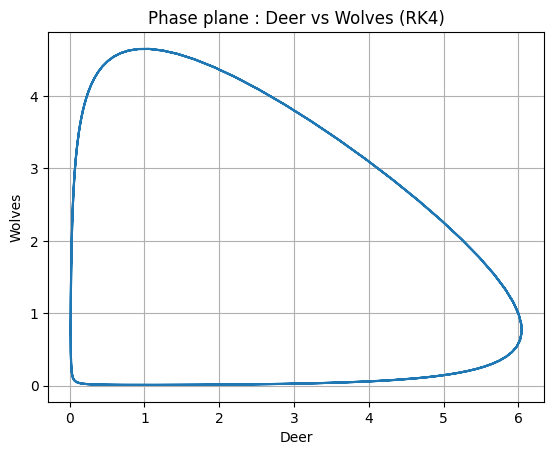

In [14]:
plt.figure()
plt.plot(Xrk4[:, 0], Xrk4[:, 1], "-")
plt.xlabel("Deer")
plt.ylabel("Wolves")
plt.grid()
plt.title("Phase plane : Deer vs Wolves (RK4)");